In [24]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D , BatchNormalization , Flatten , Dropout , MaxPooling2D , GlobalMaxPooling2D, Dense

In [26]:
cifar10 = tf.keras.datasets.cifar10
(X_train , y_train) , (X_test, y_test) = cifar10.load_data()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [27]:
y_test = y_test.flatten()
y_train = y_train.flatten()
X_train = X_train/255
X_test = X_test/255 

6


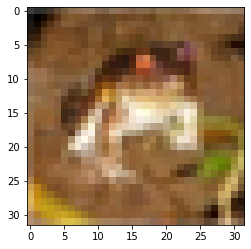

In [28]:
plt.imshow(X_train[0])
print(y_train[0])

In [29]:
#number of classes
k = len(np.unique(y_test))

In [30]:
i = Input(shape=(32,32,3))

x = Conv2D(32,(3,3),activation='relu',padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32,(3,3),activation = 'relu',padding= 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)
x = Conv2D(64,(3,3),activation='relu',padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)  

x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation='softmax')(x)

model = Model(i,x)

In [31]:
from tensorflow.keras.optimizers import  Adam
adam = Adam(0.0001)
model.compile(optimizer=adam,
              loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

In [32]:
model.compile(optimizer=adam,
              loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

In [33]:
# Fit
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 13s 8ms/step - loss: 2.2095 - accuracy: 0.2530 - val_loss: 1.3989 - val_accuracy: 0.4930
Epoch 2/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5068 - accuracy: 0.4472 - val_loss: 1.2385 - val_accuracy: 0.5509
Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2712 - accuracy: 0.5371 - val_loss: 1.0646 - val_accuracy: 0.6211
Epoch 4/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1167 - accuracy: 0.5976 - val_loss: 0.9659 - val_accuracy: 0.6542
Epoch 5/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0116 - accuracy: 0.6390 - val_loss: 0.9348 - val_accuracy: 0.6592
Epoch 6/50
1563/1563 [==============================] - 12s 7ms/step - loss: 0.9435 - accuracy: 0.6675 - val_loss: 0.8397 - val_accuracy: 0.6993
Epoch 7/50
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8831 - accuracy: 0.6819 - val_loss: 0.8085 - val_ac

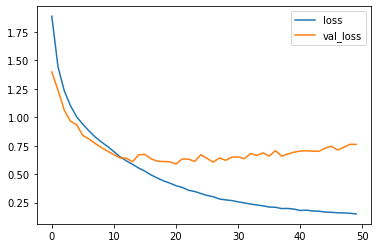

In [34]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

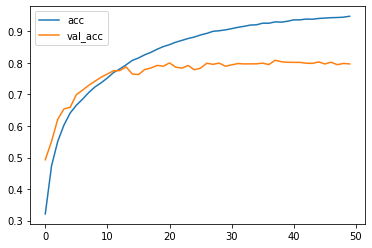

In [35]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [38]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(X_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.6596 - accuracy: 0.7827 - val_loss: 0.6520 - val_accuracy: 0.7788
Epoch 2/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.6062 - accuracy: 0.7929 - val_loss: 0.6172 - val_accuracy: 0.7927
Epoch 3/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.5837 - accuracy: 0.7999 - val_loss: 0.5890 - val_accuracy: 0.7965
Epoch 4/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.5744 - accuracy: 0.8048 - val_loss: 0.5772 - val_accuracy: 0.8051
Epoch 5/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.5642 - accuracy: 0.8078 - val_loss: 0.5649 - val_accuracy: 0.8085
Epoch 6/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.5542 - accuracy: 0.8106 - val_loss: 0.5899 - val_accuracy: 0.8016
Epoch 7/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.5393 - accuracy: 0.8144 - val_loss: 0.5307 -